# Class 4 - Building and Assessing ML Models

## 1. Import needed modules

In [1]:
using Downloads
using CSV
using MLJ
using DataFrames
using GLM
using Plots
using ROCCurves
using FreqTables
using StatsPlots

## 2. Data Loading, pre-processing and splitting into train and validation subsets

### Data loading & pre-processing

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
Downloads.download(url, "australian.csv")

"australian.csv"

In [3]:
dataset = CSV.read("australian.csv", DataFrame, delim=' ';
                header = append!([string("V",i) for i in 0:13], ["class"]))

Row,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,class
,Int64,Float64,Float64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
2,0,22.67,7.0,2,8,4,0.165,0,0,0,0,2,160,1,0
3,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
4,0,21.67,11.5,1,5,3,0.0,1,1,11,1,2,0,1,1
5,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
6,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1
7,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0
8,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1
9,1,27.83,1.0,1,2,8,3.0,0,0,0,0,2,176,538,0


In [4]:
dataset.V3 =ifelse.(dataset.V3 .== 1,0,1)
dataset.V11 =ifelse.(dataset.V11 .== 1,0,1)
dataset.V13 = log.(dataset.V13) 
dataset

Row,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,class
,Int64,Float64,Float64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64
1,1,22.08,11.46,1,4,4,1.585,0,0,0,1,1,100,7.10085,0
2,0,22.67,7.0,1,8,4,0.165,0,0,0,0,1,160,0.0,0
3,0,29.58,1.75,0,4,4,1.25,0,0,0,1,1,280,0.0,0
4,0,21.67,11.5,0,5,3,0.0,1,1,11,1,1,0,0.0,1
5,1,20.17,8.17,1,6,4,1.96,1,1,14,0,1,60,5.0689,1
6,0,15.83,0.585,1,8,8,1.5,1,1,2,0,1,100,0.0,1
7,1,17.42,6.5,1,3,4,0.125,0,0,0,0,1,60,4.61512,0
8,0,58.67,4.46,1,11,8,3.04,1,1,6,0,1,43,6.32972,1
9,1,27.83,1.0,0,2,8,3.0,0,0,0,0,1,176,6.28786,0


In [5]:
training_fraction = 0.6
train, test = partition(eachindex(dataset.class), training_fraction, shuffle=true)

([561, 503, 62, 57, 70, 401, 1, 310, 41, 240  …  20, 374, 577, 456, 324, 520, 97, 657, 364, 132], [683, 158, 623, 284, 35, 304, 655, 511, 482, 250  …  506, 119, 4, 100, 110, 496, 497, 301, 531, 66])

In [6]:
train_dataset = dataset[train,:]
test_dataset = dataset[test,:]

Row,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,class
,Int64,Float64,Float64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64
1,0,22.92,11.585,1,13,4,0.04,1,0,0,0,1,80,7.20786,1
2,1,37.5,0.835,1,10,4,0.04,0,0,0,0,1,120,1.79176,0
3,0,23.25,5.875,1,11,4,3.17,1,1,10,0,1,120,5.50533,1
4,1,38.92,1.75,1,4,4,0.5,0,0,0,1,1,300,1.09861,0
5,1,42.83,1.25,1,7,4,13.875,0,1,1,1,1,352,4.72739,0
6,1,18.58,5.71,1,2,4,0.54,0,0,0,0,1,120,0.0,0
7,1,31.57,0.375,1,2,4,0.875,1,0,0,1,0,928,0.0,0
8,1,21.42,0.75,0,12,7,0.75,0,0,0,1,1,132,1.09861,0
9,1,21.5,9.75,1,8,4,0.25,1,0,0,0,1,140,0.0,0


In [7]:
size.([train_dataset, test_dataset])

2-element Vector{Tuple{Int64, Int64}}:
 (414, 15)
 (276, 15)

## 3. Building logistic regression model
- https://en.wikipedia.org/wiki/Logistic_regression
- https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

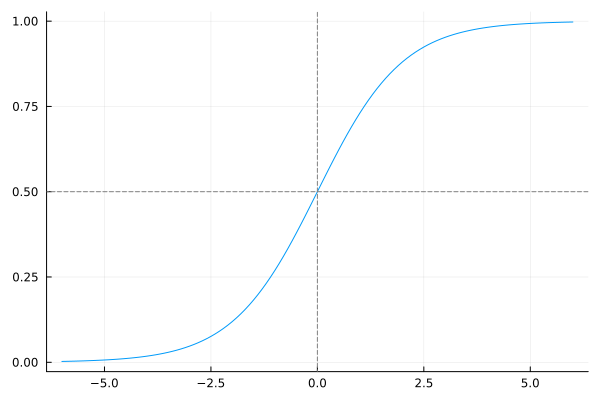

In [8]:
logistic(x) = 1 / (1 + exp(-x))
x = collect(-6:.1:6)
plot(x, logistic.(x), legend=false)
vline!([0], line=:dash, color=:grey)
hline!([1/2], line=:dash, color=:grey)

In [9]:
model_log_reg_fit = glm(Term(:class) ~ sum(Term.(Symbol.(names(dataset[:, Not(:class)])))),
                        train_dataset, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

class ~ 1 + V0 + V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  -5.87474     1.05108     -5.59    <1e-07  -7.93482     -3.81465
V0           -0.181144    0.345279    -0.52    0.5998  -0.857878     0.49559
V1            0.0316003   0.0155412    2.03    0.0420   0.00114008   0.0620605
V2            0.0144364   0.0362449    0.40    0.6904  -0.0566022    0.085475
V3            0.557129    0.399252     1.40    0.1629  -0.225391     1.33965
V4            0.234421    0.0535049   

Model coefficients:

In [10]:
coef(model_log_reg_fit)

15-element Vector{Float64}:
 -5.874735378696694
 -0.18114389723459523
  0.03160029565482465
  0.014436411910248971
  0.5571293027186078
  0.2344214027118372
  0.0668550099458146
 -0.001621425302047384
  3.3091230770116002
  0.5760869747658351
  0.13652438553850504
 -0.36858087421788216
 -0.5781841330071714
 -0.00112284421003085
  0.16176816371625827

### Prediction

In [11]:
train_pred = GLM.predict(model_log_reg_fit)

414-element Vector{Float64}:
 0.03173021609491979
 0.9676313800430253
 0.08141145338120537
 0.8852816923096798
 0.9811027718350981
 0.012503802623076285
 0.0341120833491107
 0.080514396183785
 0.7823013530071334
 0.780702778487853
 0.18313626731362756
 0.017866173064193473
 0.9555011245424937
 ⋮
 0.6877292658758826
 0.00321711635031825
 0.9768172264845899
 0.1453124132666643
 0.13534691273741772
 0.2406939909282627
 0.2684285704395396
 0.006851048316122625
 0.11891133667865299
 0.8180987424818904
 0.006439959514948277
 0.026516749735648652

In [12]:
test_pred = GLM.predict(model_log_reg_fit, test_dataset)

276-element Vector{Union{Missing, Float64}}:
 0.9367822419986878
 0.10782131446597011
 0.9774881891636339
 0.01559318034121098
 0.10851064915412027
 0.00810832387784942
 0.13443192237325782
 0.047173175695978585
 0.5093834129848821
 0.018817709500431885
 0.732062998810205
 0.8860211551912017
 0.1326594414500467
 ⋮
 0.19939031901776635
 0.06077758334438452
 0.7954805391740611
 0.9563181282216224
 0.6876052065446187
 0.835725606985456
 0.027614313180512284
 0.22562868690590998
 0.5958493376692068
 0.9682855863231696
 0.02038665977836561
 0.9848255151153931

## 4. Assessing model performance
### Visual analysis of a model
#### Score-density plots

Predicting labels on test dataset:

In [13]:
test_pred_1 = test_pred[test_dataset.class .== 1]
test_pred_0 = test_pred[test_dataset.class .== 0];

Visualizing model's score on histogram with two series - one for each class of 'target' column:

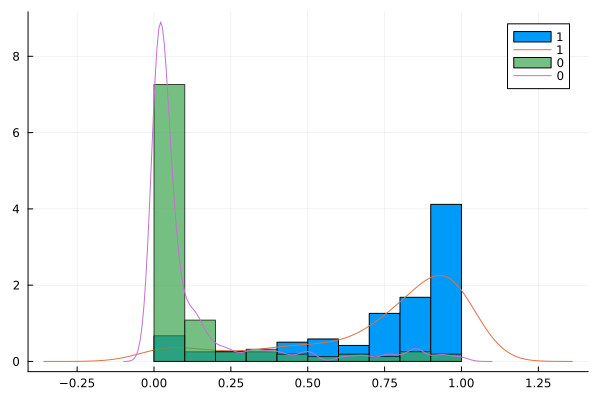

In [14]:
histogram(test_pred_1, normalize=true, bins=10, label=1)
density!(test_pred_1, label=1)
histogram!(test_pred_0, normalize=true, bins=10, label=0, seriesalpha=0.7)
density!(test_pred_0, label=0)


The more non-overlapping distributions the better predictive model.

#### Wizard model - ideal predicitons

In [15]:
ideal_pred = test_dataset.class
ideal_pred_1 = ideal_pred[test_dataset.class .== 1]
ideal_pred_0 = ideal_pred[test_dataset.class .== 0];

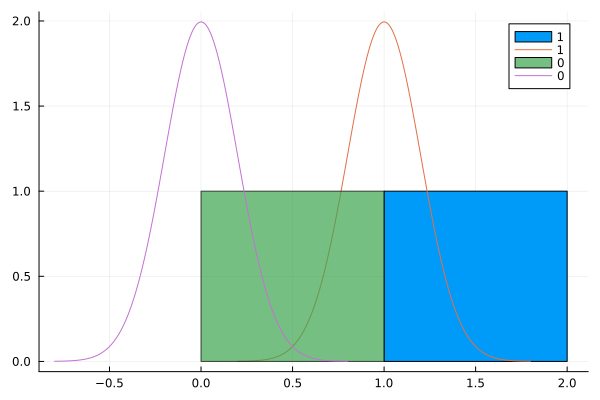

In [16]:
histogram(ideal_pred_1, normalize=true, bins=10, label=1)
density!(ideal_pred_1, label=1, bandwidth=.2)
histogram!(ideal_pred_0, normalize=true, bins=10, label=0, seriesalpha=0.7)
density!(ideal_pred_0, label=0, bandwidth=0.2)


No overlapping scores between $Y=1$ and $Y=0$ is equivalent with a perfect model. Some overlapped kernel densities above results from high bandwidth hyperparameter used in kerned density estimation procedure, but empiracally there's no overlap.

#### Random model

In [17]:
random_pred = rand(length(test_dataset.class))
random_pred_1 = random_pred[test_dataset.class .== 1]
random_pred_0 = random_pred[test_dataset.class .== 0];


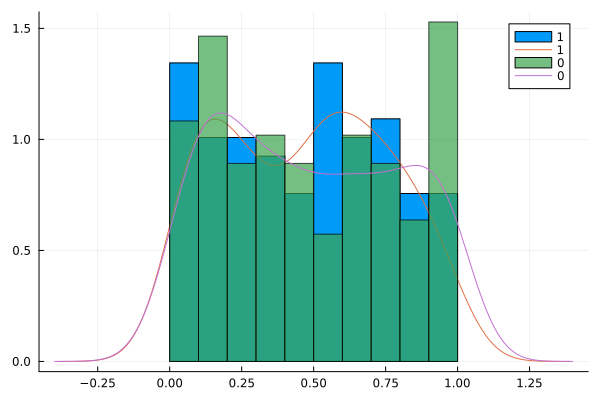

In [18]:
using Plots
# Visualize model's score on histogram with two series - one for each class of 'target' column
histogram(random_pred_1, normalize=true, bins=10, label=1)
density!(random_pred_1, label=1)
histogram!(random_pred_0, normalize=true, bins=10, label=0, seriesalpha=0.7)
density!(random_pred_0, label=0)

Both distribution overlap heavily each other and are difficult to be distinguished. This is a sign of very poor predictive performance.

### ROC curve

Calculating and plotting ROC curves for both training and test datasets as well as for wizard and random models:

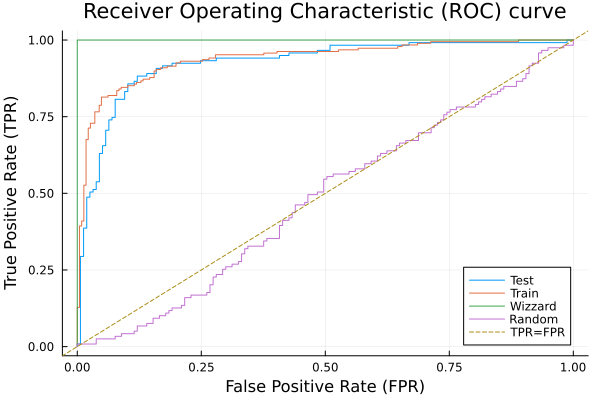

In [19]:
train_fpr, train_tpr = ROCCurves.roc(train_pred, train_dataset.class)
test_fpr, test_tpr = ROCCurves.roc(test_pred, test_dataset.class)
ideal_fpr, ideal_tpr = ROCCurves.roc(ideal_pred, test_dataset.class)
random_fpr, random_tpr = ROCCurves.roc(random_pred, dataset.class[test])

plot(test_fpr, test_tpr, label="Test", xlabel="False Positive Rate (FPR)",
    ylabel="True Positive Rate (TPR)",
    title ="Receiver Operating Characteristic (ROC) curve",  legend=:bottomright)
plot!(train_fpr, train_tpr, label="Train")
plot!(ideal_fpr, ideal_tpr, label="Wizzard")
plot!(random_fpr, random_tpr, label="Random")
Plots.abline!(1, 0, line=:dash, label = "TPR=FPR")

Ideal model has ROC composed of 1-point at $(0, 1)$ resulting in perfect identification of $Y=1$ while making no errors. The better model, the closer its ROC is to this ideal point of $(0,1)$ resulting also in higher area the curve, which is numerical measurement of model performance presented below.

### AUC - Area Under Curve

Calculating AUC for training, test data and wizard and random models:

In [20]:
println("AUC metric on train dataset is equal to: ", auc_roc(train_fpr, train_tpr))
println("AUC metric on test dataset is equal to: ", auc_roc(test_fpr, test_tpr))
println("AUC metric of wizzard model is equal to: ", auc_roc(ideal_fpr, ideal_tpr))
println("AUC metric of random model is equal to: ", auc_roc(random_fpr, random_tpr))

AUC metric on train dataset is equal to: 0.9392299002071165
AUC metric on test dataset is equal to: 0.9250120430337744
AUC metric of wizzard model is equal to: 1.0
AUC metric of random model is equal to: 0.48172135096076646


- discrepancy beetween train and test AUC measurement is the sign of overfitting
- wizard model would have AUC equal to 1, which random model around 0.5
- simulating ROC for random model with the same number of observation as test set has, enables to understand the sampling error of test set ROC 

### Gain chart

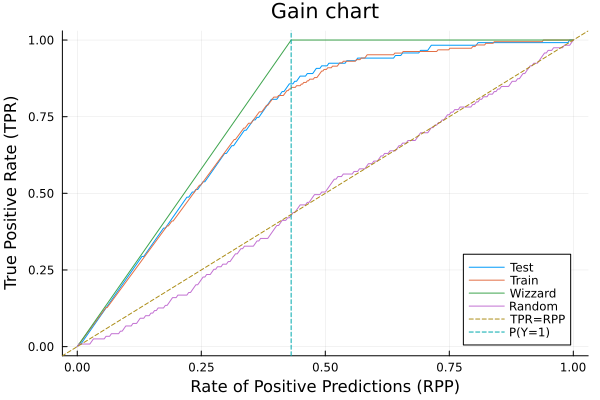

In [21]:
test_rpp = collect(0:length(test_tpr)-1)./(length(test_tpr)-1)
train_rpp = collect(0:length(train_tpr)-1)./(length(train_tpr)-1)

plot(test_rpp, test_tpr, label="Test", xlabel="Rate of Positive Predictions (RPP)",
     ylabel="True Positive Rate (TPR)", title= "Gain chart", legend=:bottomright)
plot!(train_rpp, train_tpr, label="Train")
plot!(test_rpp, ideal_tpr, label="Wizzard")
plot!(test_rpp, random_tpr, label="Random")
Plots.abline!(1, 0, line=:dash, label = "TPR=RPP")
vline!([mean(dataset.class[test])] ,line=:dash, label = "P(Y=1)")

- wizard model will increase linearly, so it achieves maximum of $TPR = 1$ for $RPP = P(Y=1)$
- random model gain chart is around 45-degree line

### Lift chart

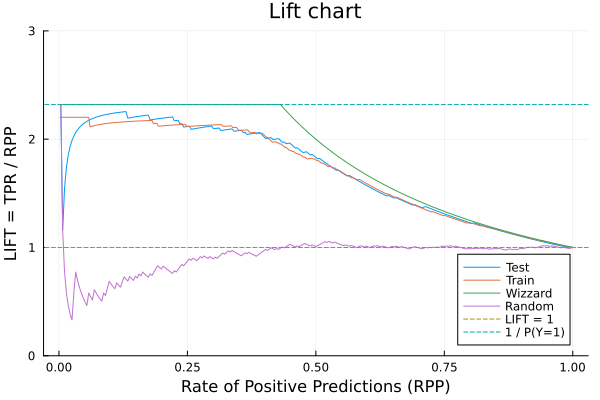

In [22]:
plot(test_rpp, test_tpr ./ test_rpp, label="Test", xlabel="Rate of Positive Predictions (RPP)",
     ylabel="LIFT = TPR / RPP", title= "Lift chart", legend=:bottomright,
     ylim = (0, ceil(Int, 1/mean(dataset.class[test]))))
plot!(train_rpp, train_tpr ./ train_rpp, label="Train")
plot!(test_rpp, ideal_tpr ./ test_rpp, label="Wizzard")
plot!(test_rpp, random_tpr ./ test_rpp, label="Random")
Plots.abline!(0, 1, line=:dash, label = "LIFT = 1")
Plots.abline!(0, 1/mean(dataset.class[test]),  
     line=:dash, label = "1 / P(Y=1)")

- Lift measures how many times model's TPR is higher in comparison to TPR of random model for a given RPP, e.g. LIFT = 2 means that models indetifies 2 times more label $Y=1$ than a random model.
- Wizard model LIFT is equal to $ 1/P(Y=1)$ for $RPP < P(Y=1)$ and afterward decrease hiperbolically towards $LIFT =1$, which is a benchmark value for a random model. 

## 5. Confusion matrix

❗ Remember class indicator (0, 1,...) and actual or predicted values may be switched in confusion matrix

<img src="https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png" width=400>

<img src="https://miro.medium.com/max/1780/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg"  width=400>

**Performance measures derived from confusion matrix:**

- Accuracy - percentage of correct predictions

`ACC = (TP + TN)/(TP + FP + TN + FN)`

- Precision - percentage of positive predictions which were actually correct

`PREC = TP / (TP + FP)`

-  Recall - what percentage of actual positives were predicted correctly
 (Recall = Sensitivity = Hit rate = True Positive Rate (TPR))
 
`REC = TP / (TP + FN)`

- Specificity - what percentage of actual negatives were predicted correctly (Specificity = True Negative Rate)

`TNR = TN / (TN + FP)`

- F1 Score - traditional F-measure or balanced F-score (F1 score) is the harmonic mean of precision and recall

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)

Calculating confusion matrices for prediction on train and test data as well as random and wizard models with a 0.5 cut-off threshold:

In [23]:
conf_mat_train = freqtable(train_pred .> 0.5, train_dataset.class)

2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │   0    1
────────────┼─────────
false       │ 195   24
true        │  31  164

In [24]:
conf_mat_test = freqtable(test_pred .> 0.5, test_dataset.class)

2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │   0    1
────────────┼─────────
false       │ 143   23
true        │  14   96

In [25]:
conf_mat_ideal = freqtable(ideal_pred .> 0.5, test_dataset.class)

2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │   0    1
────────────┼─────────
false       │ 157    0
true        │   0  119

In [26]:
conf_mat_random = freqtable(random_pred .> 0.5, test_dataset.class)

2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │  0   1
────────────┼───────
false       │ 84  60
true        │ 73  59

Writing a function to calculate accuracy, precision, recall and f1-score:

In [27]:
function quality_report(mat::AbstractMatrix)
    acc = (mat[1,1] + mat[2,2]) / sum(mat)
    prec = mat[2,2] / sum(mat[2,:])
    rec = mat[2,2] / sum(mat[:,2])
    f1 = 2 * prec * rec / (prec + rec)
    println("----Classification quality report----")
    println("Accuracy: ", round(acc*100,digits=2), "%")
    println("Precision: ", round(prec*100,digits=2), "%")
    println("Recall: ", round(rec*100,digits=2), "%")
    println("F1-score: ", round(f1*100,digits=2), "%")
end

quality_report (generic function with 1 method)

Printing the reports for both datasets, as well as wizard and random models. Results are quite close similar to what we have seen on ROC curves:

In [28]:
println("Train set")
quality_report(conf_mat_train)
println("\nTest set")
quality_report(conf_mat_test)
println("\nWizzard model:")
quality_report(conf_mat_ideal)
println("\nRandom model:")
quality_report(conf_mat_random)

Train set
----Classification quality report----
Accuracy: 86.71%
Precision: 84.1%
Recall: 87.23%
F1-score: 85.64%

Test set
----Classification quality report----
Accuracy: 86.59%
Precision: 87.27%
Recall: 80.67%
F1-score: 83.84%

Wizzard model:
----Classification quality report----
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%

Random model:
----Classification quality report----
Accuracy: 51.81%
Precision: 44.7%
Recall: 49.58%
F1-score: 47.01%


## Exercises

Load Iris dataset from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv to 'iris' DataFrame

Code `species` column to have value 1 if iris is from _versicolor_ species and 0 otherwise

Split dataset to train and validation subsets. Training set should have **75%** of all observations.

Build logistic regression using **Elastic-net** regularization with 0.35 L1 ratio (only one solver supports that, check [here](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression))

You can read more about **Elastic-net** [here](https://en.wikipedia.org/wiki/Elastic_net_regularization)

Make classification report. What is accuracy of the model?

*Preparation of this workshop has been supported by the Polish National Agency for Academic Exchange under the Strategic Partnerships programme, grant number BPI/PST/2021/1/00069/U/00001.*

![SGH & NAWA](logo.png)